# Exploratory Data Analysis using Python - A Case Study

*Analyzing the Android Market from data of 10k Google Play Store apps 2018*

### How to run the code

This is an executable [*Jupyter notebook*](https://jupyter.org) hosted on [Jovian.ml](https://www.jovian.ml), a platform for sharing data science projects. You can run and experiment with the code in a couple of ways: *using free online resources* (recommended) or *on your own computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing this notebook is to click the "Run" button at the top of this page, and select "Run on Binder". This will run the notebook on [mybinder.org](https://mybinder.org), a free online service for running Jupyter notebooks. You can also select "Run on Colab" or "Run on Kaggle".


#### Option 2: Running on your computer locally

1. Install Conda by [following these instructions](https://conda.io/projects/conda/en/latest/user-guide/install/index.html). Add Conda binaries to your system `PATH`, so you can use the `conda` command on your terminal.

2. Create a Conda environment and install the required libraries by running these commands on the terminal:

```
conda create -n gps_venv -y python=3.8 
conda activate gps_venv
pip install jovian jupyter numpy pandas matplotlib seaborn opendatasets --upgrade
```

3. Press the "Clone" button above to copy the command for downloading the notebook, and run it on the terminal. This will create a new directory and download the notebook. The command will look something like this:

```
jovian clone notebook-owner/notebook-id
```



4. Enter the newly created directory using `cd directory-name` and start the Jupyter notebook.

```
jupyter notebook
```

You can now access Jupyter's web interface by clicking the link that shows up on the terminal or by visiting http://localhost:8888 on your browser. Click on the notebook file (it has a `.ipynb` extension) to open it.


# Introduction

We'll use the Google App Sotres dataset for our analysis.
You can find the raw here: https://www.kaggle.com/lava18/google-play-store-apps.

There are several options for getting the dataset into Jupyter:

- Download the CSV manually and upload it via Jupyter's GUI
- Use the `urlretrieve` function from the `urllib.request` to download CSV files from a raw URL directly
- Use a helper library e.g. [`opendatasets`](https://github.com/JovianML/opendatasets), which contains a collection of curated datasets and provides a function for directly download.

We'll use the download csv files from the link

In [1]:
# Imports

import os
import sys
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Loding DataSets

The dataset contains two csv files one with information about the apps and second with the reviews of particular apps.
Loding Google App Store dataset and there respective reviews from second csv file and creating a combined dataframe from it.

In [2]:
gps_app_data_df = pd.read_csv('googleplaystore.csv')
gps_app_data_df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [3]:
gps_user_review_df = pd.read_csv('googleplaystore_user_reviews.csv')
gps_user_review_df.head(2)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462


In [4]:
# Merge csv for combined dataset

gps_df = gps_app_data_df.merge(gps_user_review_df, how='left', on='App')
gps_df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,NaN,NaN,NaN,NaN
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.25,1.0


# Analysing DataSet Structure

We will check the columns and their datatypes, so that we can have a look for invalid data and perform cleaning on those.

#### *Functions Used*

- pandas.DataFrame.shape   : _Will return the total number of rows and columns in the dataframe_
- pandas.DataFrame.columns : _Willl return the list of columns present_
- pandas.DataFrame.info    : _Will provide me information of the datatypes of each columns_

In [5]:
gps_df.shape

(131971, 17)

In [6]:
gps_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [7]:
gps_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131971 entries, 0 to 131970
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   App                     131971 non-null  object 
 1   Category                131971 non-null  object 
 2   Rating                  130458 non-null  float64
 3   Reviews                 131971 non-null  object 
 4   Size                    131971 non-null  object 
 5   Installs                131971 non-null  object 
 6   Type                    131970 non-null  object 
 7   Price                   131971 non-null  object 
 8   Content Rating          131970 non-null  object 
 9   Genres                  131971 non-null  object 
 10  Last Updated            131971 non-null  object 
 11  Current Ver             131963 non-null  object 
 12  Android Ver             131968 non-null  object 
 13  Translated_Review       72605 non-null   object 
 14  Sentiment           

# Preparing and Cleaning the DataSet

We can see above that some of the fields are having data which is not in required format.

*Example:*

Size column contains values in MB/KB/GB/Varies with devices which are not valid for calculating size
Hence converting all the sizes to MBs and refering NaN and Variations with 0.0 MB
         
Further analyzing the dataset we also found 2 wrong entries like Installs - contains a value Free and Category containing 1.9.
Therefore removing these values also.

Since, Installs are also in string converting those too as numbers and fillinf NaN values with 0.0

#### *Functions Used*

- pandas.DataFrame.drop: _Will remove a particular column based on the condition provided_
- pandas.DataFrame.fillna: _Will replace NaN values with the value specified_
- pandas.DataFrame.apply: _Will allow us to pass custom functions and process data based on those_

In [8]:
# Preparing Data for missing and wrong values in columns

# Removing unwanted entries
gps_df.drop(gps_df[(gps_df['Installs'] == 'Free')].index, inplace=True)
gps_df.drop(gps_df[(gps_df['Category'] == '1.9')].index, inplace=True)

# Filling NaN values with 0.0
gps_df['Rating'] = gps_df['Rating'].fillna(0.0)
gps_df['Reviews'] = gps_df['Reviews'].fillna(0.0)

# Converting Strings to Numbers
gps_df['Installs_in_num'] = gps_df['Installs'].apply(lambda x: int(str(x).replace(',', '').strip('+')) if str(x).lower() != 'nan' else 0)
gps_df['Reviews'] = gps_df['Reviews'].apply(lambda x: int(x) if str(x).lower() != 'nan' else 0)

# Replace NaN Values with Varies with device
gps_df['Size'] = gps_df['Size'].fillna('Varies with device')

def size_calc(size):
    """
        Function to convert size to MB and return 0.0 if size is other than valid size values
    """
    size = str(size)
    if size == 'Varies with device':
        return 0.0
    
    val = float(size[:-1])
    param = size[len(size) - 1:].lower()
    
    if param == 'm':
        return val
    elif param == 'k':
        return val / 1000
    elif param == 'g':
        return val * 1000

# Add Column with Size in Mbs for further analysis    
gps_df['Size_in_mb'] = gps_df['Size'].apply(size_calc)

# Analysing the processed dataset

In order to analyse the dataset we will take directed approach. We will try to find the answers to some questions which will help us to analyze the areas we can grow or make changes for better growth of Android App Development.

####  *Below are some questions we will try to solve from analyzing the given dataset*

    1. Apps installed more than a million copies and rating is above 4.0 ?
    2. Top 5 Categories with least number of apps?
    3. Top 5 Categories with least number of apps?
    4. Plot Average Ratings of Apps per Category?
    5. Plot a Comparion of Reviews with their respective Ratings?
    6. Plot a graph to analyze number of free apps per category?
    7. Compare free apps and paid apps per category ?
    8. Details of top apps with highest reviews per category?
    9. Plot Comparison between size and ratings of free and paid apps.
    10. Plot a comparision graph between type of apps and their content rating



### Question - 1

##### Apps installed more than a million copies and rating is above 4.0 ?

This will give us an overview of list of all the apps who are sold more that a million copies and also rated more that 4.0.

#### *Approach*

To analysize this we will simply provide the required condition to the dataframe and create a new dataframe from it.

#### *Functions Used*

- pandas.DataFrame: _We can pass the condition to the dataframe itself to return the result_

In [9]:
# Apps installed more than a million copies and rating is above 4.0 ?

apps_installed_more_than_million = gps_df[(gps_df['Rating'] > 4.0) & (gps_df['Installs_in_num'] > 1000000)]
apps_installed_more_than_million[['App']]

,App
59,"U Launcher Lite – FREE Live Cool Themes, Hide ..."
60,Sketch - Draw & Paint
168,Tattoo Name On My Photo Editor
213,FlipaClip - Cartoon animation
214,FlipaClip - Cartoon animation
...,...
131820,MX Player Codec (ARMv7)
131870,PhotoFunia
131911,Modern Strike Online
131914,Big Hunter


### Question - 2

##### Top 5 Categories with least number of apps?

We can analyze which category is most untouched till now, so that we can have a look if we can develop something for that category. This will give us overview of the comptetions.

#### *Approach*

We will group the list of apps based on their category and then count them for each group.
Once done we will sort the list in ascending order and return top 5 rows.

#### *Functions Used*

- pandas.DataFrame.groupby: _Lets us to group something based on the column provided_
- pandas.DataFrame.sort_values: _Sort dataframe based on the columns provided_
- pandas.DataFrame.head: _returns n number of top rows based on the value provided_

In [10]:
genre_with_least_apps = gps_df.groupby(['Category']).count()[['App']]
genre_with_least_apps.sort_values(['App']).head(5)

,App
Category,
COMICS,333
EVENTS,337
WEATHER,355
PARENTING,489
MAPS_AND_NAVIGATION,566


### Question - 3

##### Plot a graph based on App Count per Category?

Listing data and reading a huge set is much difficult to read. 
Therefore let's take a visual approach of having a look over the trend of apps created in each categories.

##### *Approach*

We will use the above dataset we just created to plot the graph for visualizing apps created per category.

##### *Functions Used*

- matplotlib.pyplot.figure: _Creates a graph based on size provided_
- matplotlib.pyplot.plot: _Plots the graph with the dataset provided_
- matplotlib.pyplot.title: _Adds title to the graph_
- matplotlib.pyplot.xticks: _Allow us to change configuraton of x labels_
- matplotlib.pyplot.legend: _Adds legend to provide the information about what lines represent_

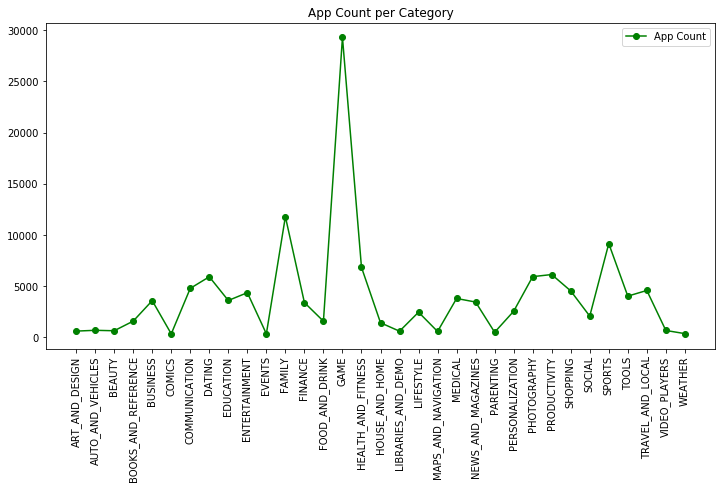

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(genre_with_least_apps.App, marker='o', c='g')
plt.title('App Count per Category')
plt.xticks(rotation='vertical')
plt.legend(['App Count']);

### Question - 4

##### Plot Average Ratings of Apps per Category?

Now we got the knowledge of which category has less number of apps but its required to know how well those apps are performing.
If they are very good there will less chance of our app to progress. For that let's analyze the ratings of those apps.

##### *Approach*

We will group the data based on the category and try to find the average for Ratings. We will use the dataset we just created to plot the graph for visualizing reviews of apps created per category.

##### *Functions Used*

- pandas.DataFrame.groupby: _Lets us to group something based on the column provided_
- matplotlib.pyplot.figure: _Creates a graph based on size provided_
- matplotlib.pyplot.plot: _Plots the graph with the dataset provided_
- matplotlib.pyplot.title: _Adds title to the graph_
- matplotlib.pyplot.xticks: _Allow us to change configuraton of x labels_
- matplotlib.pyplot.legend: _Adds legend to provide the information about what lines represent_

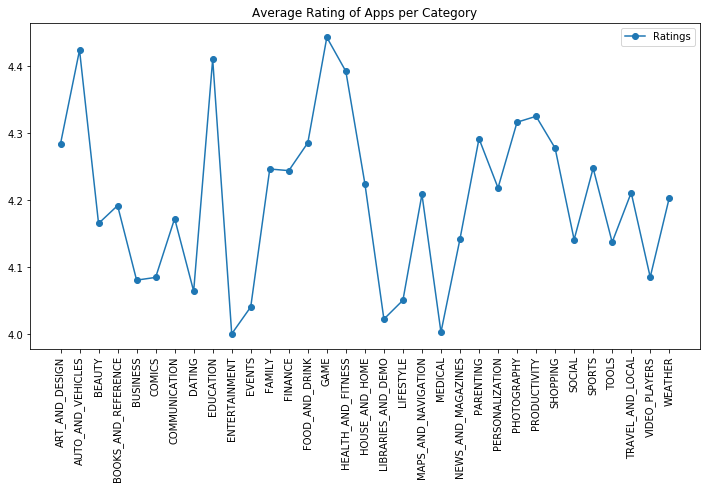

In [12]:
avg_rating_per_category_df = gps_df.groupby('Category').agg({'Rating': ['mean']})

# Plot

plt.figure(figsize=(12, 6,))

plt.plot(avg_rating_per_category_df, marker='o')
plt.title('Average Rating of Apps per Category')
plt.xticks(rotation='vertical')
plt.legend(['Ratings']);

### Question - 5

##### Plot a Comparion of Reviews with their respective Ratings?

Thats awesome, till now we got to know the _Comics_ is the category where there are less apps but there average ratings is around 3.9. Average can be some time gives us the wrong information too. You can see above that _Entertainment_ Category is having least amount of ratings this might be because of outliers those are present in dataset. Which pulls the rating far less.

Therefore lets analyze how many people are giving ratings to what ranges.

##### *Approach*

This time we will group the dataset based on the ratings and there Reviews. We will use the dataset we just created to plot a heatmap for visualizing reviews of apps created per category.

##### *Functions Used*

- pandas.DataFrame.groupby: _Lets us to group something based on the column provided_
- matplotlib.pyplot.figure: _Creates a graph based on size provided_
- seaborn.heatmap: _Plots the Heatmap with the dataset provided_
- matplotlib.pyplot.title: _Adds title to the graph_
- matplotlib.pyplot.xticks: _Allow us to change configuraton of x labels_
- matplotlib.pyplot.legend: _Adds legend to provide the information about what lines represent_

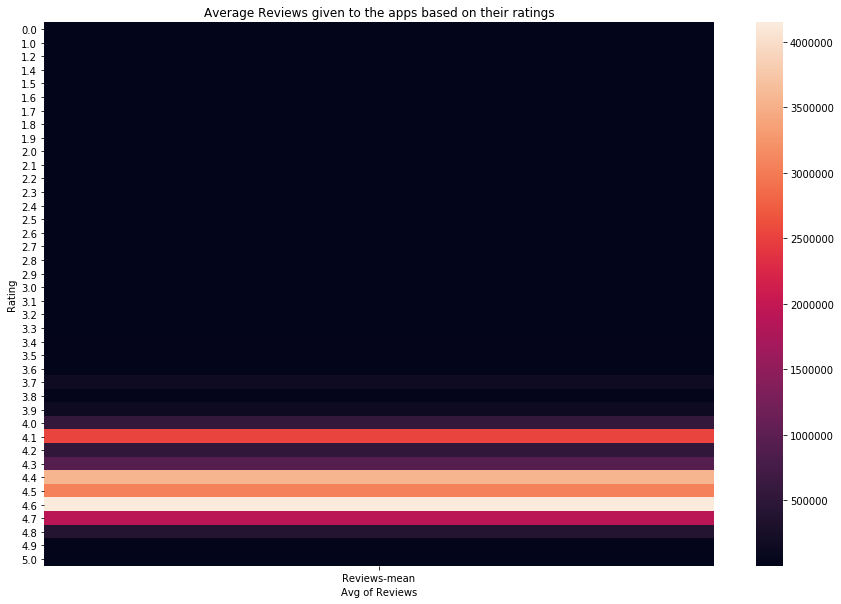

In [13]:
avg_reviews_and_ratings_df = gps_df.groupby('Rating').agg({'Reviews': ['mean']})
avg_reviews_and_ratings_df

# Plot
plt.figure(figsize=(15, 10,))

sns.heatmap(avg_reviews_and_ratings_df)
plt.title('Average Reviews given to the apps based on their ratings')
plt.yticks(rotation='horizontal')
plt.xlabel('Avg of Reviews');

### Question - 6

##### Plot a graph to analyze number of free apps per category?

We can see from the above heatmap how a large number of people are giving apps around 4.5 to 4.6 rating. Let's also analyze how many free apps are present in the category.

##### *Approach*

We will first get a dataframe with all the free apps only and then group them based on the category. We will use the dataset we just created to plot a line chart for visualizing free apps created per category.

##### *Functions Used*

- pandas.DataFrame.groupby: _Lets us to group something based on the column provided_
- matplotlib.pyplot.figure: _Creates a graph based on size provided_
- matplotlib.pyplot.plot: _Plots the graph with the dataset provided_
- matplotlib.pyplot.title: _Adds title to the graph_
- matplotlib.pyplot.xticks: _Allow us to change configuraton of x labels_
- matplotlib.pyplot.legend: _Adds legend to provide the information about what lines represent_

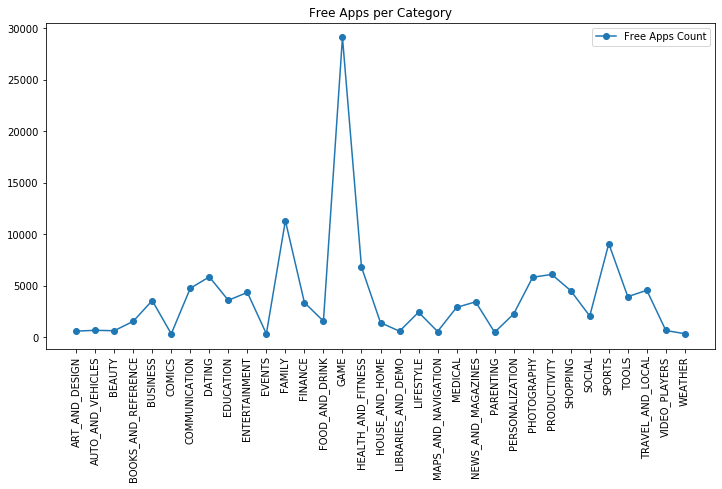

In [14]:
free_apps_per_category_df = gps_df[gps_df['Type'] == 'Free'].groupby('Category').count()[['App']]
free_apps_per_category_df

# Plot

plt.figure(figsize=(12, 6,))

plt.plot(free_apps_per_category_df, marker='o')
plt.title('Free Apps per Category')
plt.xticks(rotation='vertical')
plt.legend(['Free Apps Count']);

### Question - 7

##### Compare free apps and paid apps per category ?

We got a sense of number of free apps being developed in a particular category. Why not compare it will paid apps!

##### *Approach*

We will first get two dataframe with all the free and paid apps and then group them based on the category. We will use the dataset we just created to plot a line chart for visualizing comparision between free and paid apps created per category.

##### *Functions Used*

- pandas.DataFrame.groupby: _Lets us to group something based on the column provided_
- matplotlib.pyplot.figure: _Creates a graph based on size provided_
- matplotlib.pyplot.plot: _Plots the graph with the dataset provided_
- matplotlib.pyplot.title: _Adds title to the graph_
- matplotlib.pyplot.xticks: _Allow us to change configuraton of x labels_
- matplotlib.pyplot.legend: _Adds legend to provide the information about what lines represent_

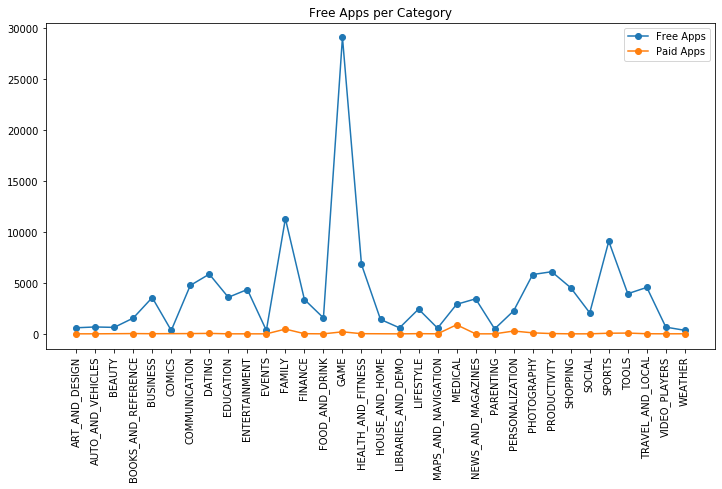

In [15]:
free_apps_per_category_df = gps_df[gps_df['Type'] == 'Free'].groupby('Category').count()[['App']]
paid_apps_per_category_df = gps_df[gps_df['Type'] == 'Paid'].groupby('Category').count()[['App']]

# Plot

plt.figure(figsize=(12, 6,))

plt.plot(free_apps_per_category_df, marker='o')
plt.plot(paid_apps_per_category_df, marker='o')
plt.title('Free Apps per Category')
plt.xticks(rotation='vertical')
plt.legend(['Free Apps', 'Paid Apps']);

### Question - 8

##### Details of top apps with highest reviews per category?

Let's get some details of the apps based on there highest reviews. We can have a look of there details and analyze what are there properties to which people are looking for.

##### *Approach*

We will get a dataframe grouped by the category and get max reviews. Then we will create a new dataframe based on the data provided.

##### *Functions Used*

- pandas.DataFrame.groupby: _Lets us to group something based on the column provided_
- pandas.DataFrame.loc: _Lets us Access a group of rows and columns by label(s) or a boolean array._

In [16]:
paid_apps_ratings_df = gps_df.groupby(['Category'], as_index=False)['Reviews'].idxmax()
paid_apps_ratings_df = gps_df.loc[paid_apps_ratings_df]
paid_apps_ratings_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Installs_in_num,Size_in_mb
115668,Textgram - write on photos,ART_AND_DESIGN,4.4,295237,Varies with device,"10,000,000+",Free,0,Everyone,Art & Design,"July 30, 2018",Varies with device,Varies with device,NaN,NaN,NaN,NaN,10000000,0.0
725,"Android Auto - Maps, Media, Messaging & Voice",AUTO_AND_VEHICLES,4.2,271920,16M,"10,000,000+",Free,0,Teen,Auto & Vehicles,"July 11, 2018",Varies with device,5.0 and up,I every drive. In car I secure phone dash run ...,Positive,0.364583,0.662500,10000000,16.0
1643,Beauty Camera - Selfie Camera,BEAUTY,4.0,113715,Varies with device,"10,000,000+",Free,0,Everyone,Beauty,"August 3, 2017",Varies with device,Varies with device,"I loved beginning now. Idk bug, I can't anymor...",Positive,0.200000,0.320833,10000000,0.0
116359,Wattpad 📖 Free Books,BOOKS_AND_REFERENCE,4.6,2915189,Varies with device,"100,000,000+",Free,0,Teen,Books & Reference,"August 1, 2018",Varies with device,Varies with device,NaN,NaN,NaN,NaN,100000000,0.0
130817,Facebook Pages Manager,BUSINESS,4.0,1279800,Varies with device,"50,000,000+",Free,0,Everyone,Business,"August 6, 2018",Varies with device,Varies with device,Are massive updates least week really necessar...,Negative,-0.046753,0.529870,50000000,0.0
116407,LINE WEBTOON - Free Comics,COMICS,4.5,1013944,Varies with device,"10,000,000+",Free,0,Teen,Comics,"July 31, 2018",Varies with device,Varies with device,NaN,NaN,NaN,NaN,10000000,0.0
6155,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,NaN,NaN,NaN,NaN,1000000000,0.0
122799,Zoosk Dating App: Meet Singles,DATING,4.0,516917,Varies with device,"10,000,000+",Free,0,Mature 17+,Dating,"August 2, 2018",Varies with device,Varies with device,NaN,NaN,NaN,NaN,10000000,0.0
16590,Duolingo: Learn Languages Free,EDUCATION,4.7,6290507,Varies with device,"100,000,000+",Free,0,Everyone,Education;Education,"August 1, 2018",Varies with device,Varies with device,"awesome... sure couple ads I mind that, actual...",Positive,0.520833,0.703704,100000000,0.0
19008,Google Play Games,ENTERTAINMENT,4.3,7165362,Varies with device,"1,000,000,000+",Free,0,Teen,Entertainment,"July 16, 2018",Varies with device,Varies with device,NaN,NaN,NaN,NaN,1000000000,0.0


### Question - 9

#### Plot Comparison between size and ratings of free and paid apps.

Cool, we got a lot of information let's have a look of the size of the apps - I don't want apps with huge sizes (Personal Prefrence).
Lets see how apps are growing in sizes for free and paid apps and how are the ratings varyies too. 

##### *Approach*

We will use dataframe's size_in_mb column and Rating column to plot over and categories the graph based on the type.

##### *Functions Used*

- matplotlib.pyplot.figure: _Creates a graph based on size provided_
- seaborn.scatterplot: _Plots the ScatterPlot with the dataset provided_
- matplotlib.pyplot.title: _Adds title to the graph_
- matplotlib.pyplot.xticks: _Allow us to change configuraton of x labels_

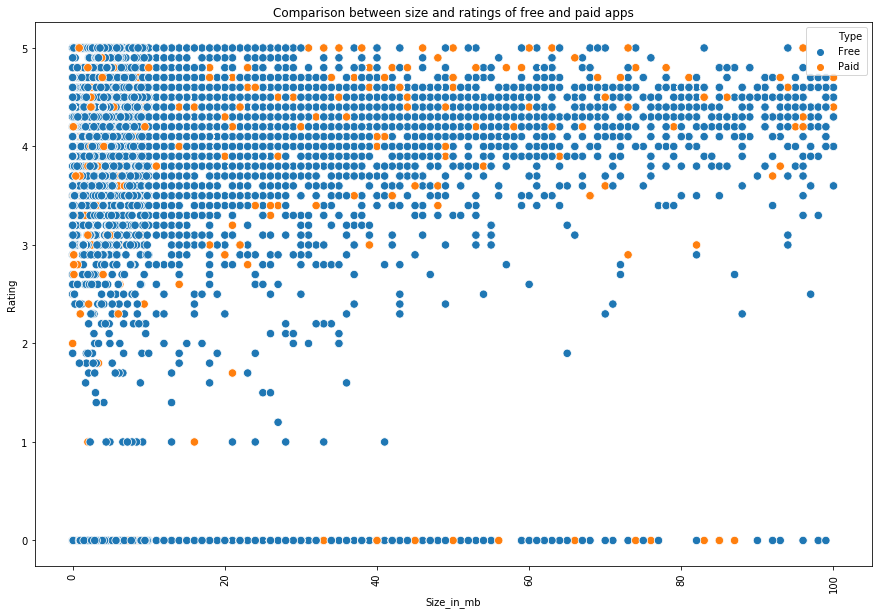

In [17]:
# Plot

plt.figure(figsize=(15, 10,))

plt.title('Comparison between size and ratings of free and paid apps')
plt.xticks(rotation='vertical')

sns.scatterplot('Size_in_mb', 
                'Rating', 
                hue='Type',
                s=70,
                data=gps_df);

### Question - 10

##### Plot a comparision graph between type of apps and their content rating

Finally, at the end of analysis - before leaving lets have a quick look how many free and paid apps are being developed based on their content rating.

##### *Approach*

We will first create two dataset based on there type (Free/Paid) and then will group them based on their Content Rating. We will use the dataset to plot a line chart for our visualization

##### *Functions Used*

- matplotlib.pyplot.figure: _Creates a graph based on size provided_
- seaborn.scatterplot: _Plots the ScatterPlot with the dataset provided_
- matplotlib.pyplot.title: _Adds title to the graph_
- matplotlib.pyplot.xticks: _Allow us to change configuraton of x labels_

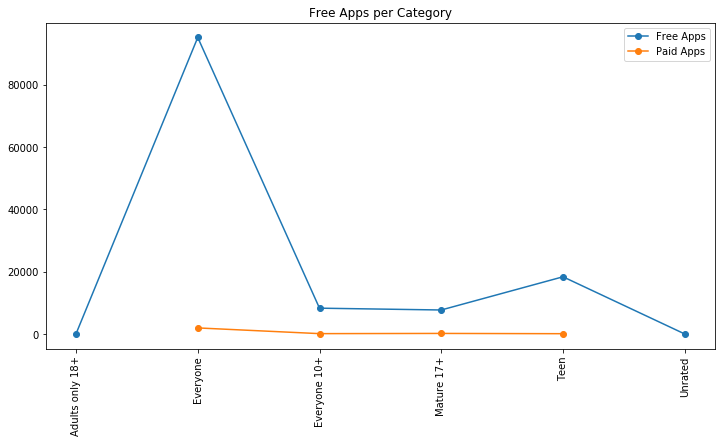

In [18]:
free_apps_per_category_df = gps_df[gps_df['Type'] == 'Free'].groupby('Content Rating').count()[['App']]
paid_apps_per_category_df = gps_df[gps_df['Type'] == 'Paid'].groupby('Content Rating').count()[['App']]

# Plot

plt.figure(figsize=(12, 6,))

plt.plot(free_apps_per_category_df, marker='o')
plt.plot(paid_apps_per_category_df, marker='o')
plt.title('Free Apps per Category')
plt.xticks(rotation='vertical')
plt.legend(['Free Apps', 'Paid Apps']);


# Inferences and Conclusions


We've drawn many interesting inferences from the survey, here's a summary of the few of them:

- Trial

References:

- Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html
- Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html
- Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html
- `opendatasets` Python library: https://github.com/JovianML/opendatasets
